In [57]:
import numpy as np

from Utils.load_models import model_classify, model_batch_classify
from tslearn.metrics.dtw_variants import dtw
def find_nun(instance, x_train, model, num_classes):
    predicted_labels = model_batch_classify(model_path=model,batch_of_timeseries=x_train, num_classes=num_classes)
    curr_label = model_classify(model_path=model,time_series=instance, num_classes=num_classes)
    all_diff = x_train[predicted_labels != curr_label]
    all_distance = [dtw(instance, x) for x in all_diff]

    min_idx = np.argmin(all_distance)
    return all_diff[min_idx]

def get_nun_CF(instance, x_train, y_train, model, num_classes):
    curr_label = model_classify(model_path=model,time_series=instance, num_classes=num_classes)
    nun = find_nun(instance, x_train, model, num_classes)
    for i in range(1, len(instance)):
        for j in range(len(instance)-i+1):
            new_instance = []
            new_instance.extend(instance[:j])
            new_instance.extend(nun[j:j+i])
            new_instance.extend(instance[j+i:])
            if (model_classify(model_path=model,time_series=new_instance, num_classes=num_classes) == curr_label):
                continue
            else:
                return np.array(new_instance)




In [58]:
from Utils.load_data import load_dataset,load_dataset_labels
from Utils.load_models import  load_pytorch_model

dataset_name = "Chinatown"
x_train = load_dataset(dataset_name=dataset_name, data_type="TRAIN_normalized")
y_train = load_dataset_labels(dataset_name=dataset_name, data_type="TRAIN_normalized")

model = f"models/{dataset_name}/knn_norm.pkl"
num_classes=len(np.unique(y_train))

In [59]:
cf_nun = get_nun_CF(instance=x_train[0],x_train=x_train,y_train=y_train,model=model,num_classes=len(np.unique(y_train)))

In [60]:
x_train[0
]

array([0.30190678, 0.1970339 , 0.15783898, 0.11069915, 0.02754237,
       0.01641949, 0.01165254, 0.01588983, 0.05826271, 0.07415254,
       0.15889831, 0.32415254, 0.64777542, 0.67690678, 0.64512712,
       0.57097458, 0.45709746, 0.57891949, 0.54872881, 0.51483051,
       0.39353814, 0.30614407, 0.21504237, 0.09480932])

In [61]:
cf_nun

array([0.13400424, 0.08898305, 0.15783898, 0.11069915, 0.02754237,
       0.01641949, 0.01165254, 0.01588983, 0.05826271, 0.07415254,
       0.15889831, 0.32415254, 0.64777542, 0.67690678, 0.64512712,
       0.57097458, 0.45709746, 0.57891949, 0.54872881, 0.51483051,
       0.39353814, 0.30614407, 0.21504237, 0.09480932])

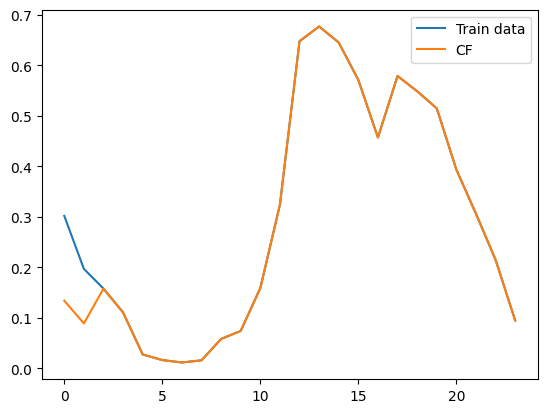

In [62]:
import matplotlib.pyplot as plt
plt.plot(x_train[0], label="Train data")
plt.plot(cf_nun, label="CF")
plt.legend()
plt.show()